In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

pd.pandas.set_option('display.max_columns', None)

Notebook to explore the Mauritian Housing dataset and how analyse each variable that was collected as well.

In [109]:
data = pd.read_csv('Mauritian_houses_cleaned.csv')
data.columns

Index(['htype', 'region', 'Project Type', 'Bedroom(s)', 'Bathroom(s)',
       'Swimming Pool', 'Parking', 'Toilet(s)', 'Construction Year', 'Garage',
       'Nb. Rooms', 'Air-con', 'Beachfront', 'Interior Surface New',
       'Land Surface New', 'Access for Disabled People', 'Access to rooftop',
       'Air Conditioning', 'Alarm System', 'Automated Garage', 'Balcony',
       'Basement', 'Carport', 'Centralized Ventilation System',
       'Close to Bus Stop', 'Close to Golf Course', 'Close to Hospital',
       'Close to School', 'Close to Shops', 'Cooking Service', 'Dressing',
       'Electric Generator', 'Energy Efficiency - High', 'Fenced',
       'Fire Alarm System', 'Fireplace', 'Fitness Room', 'Freehold Land',
       'Furnished', 'Garden', 'Guarded Parking', 'House Cleaning',
       'Indoor Spa', 'Internet/Wi-Fi', 'Laundry Room', 'Lift',
       'Located in a private morcellement', 'Located in a residential complex',
       'Located in a senior residence', 'Mountain View', 'Office',

In [110]:
data['price'] = data['price'].replace(['Price N/D'],'0')
data['price']

0        37,839,628
1        85,100,000
2        54,000,000
3       102,900,000
4        18,745,020
           ...     
6579      7,500,000
6580      5,200,000
6581      7,000,000
6582     47,822,999
6583     49,466,700
Name: price, Length: 6584, dtype: object

converting price strings into float values and also removing not disclosed prices out of the dataframe

In [111]:
data['price'] = data['price'].str.replace(',', '').astype(float)
data = data[data['price']!=0]

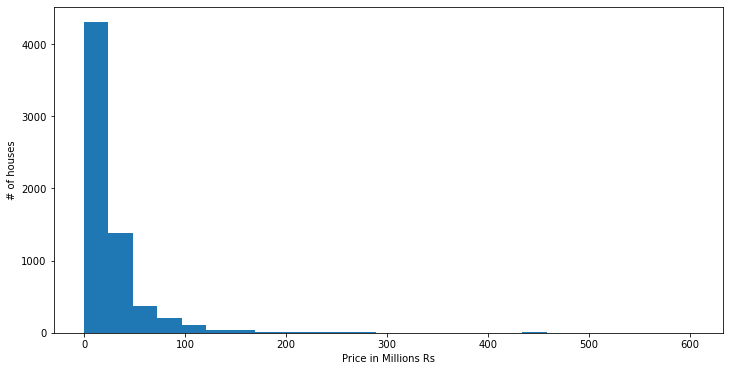

In [112]:
plt.figure(figsize=(12,6))
plt.hist(data['price']/1000000,bins=25)
plt.ylabel('# of houses')
plt.xlabel('Price in Millions Rs')
plt.show()

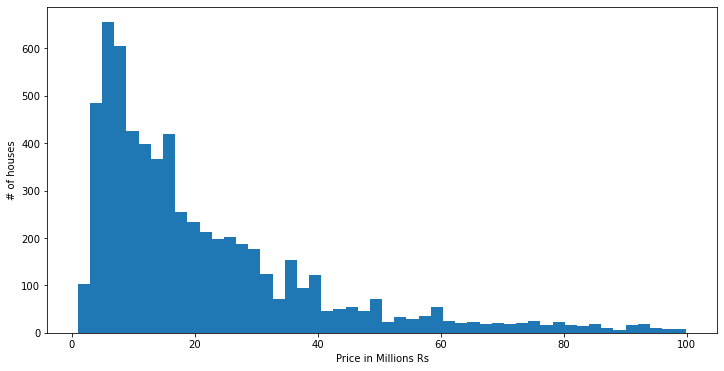

In [113]:
data = data[data['price']>data['price'].min()]
data_dum = data[data['price']<100000000]

plt.figure(figsize=(12,6))
plt.hist(data_dum['price']/1000000,bins=50)
plt.ylabel('# of houses')
plt.xlabel('Price in Millions Rs')
plt.show()

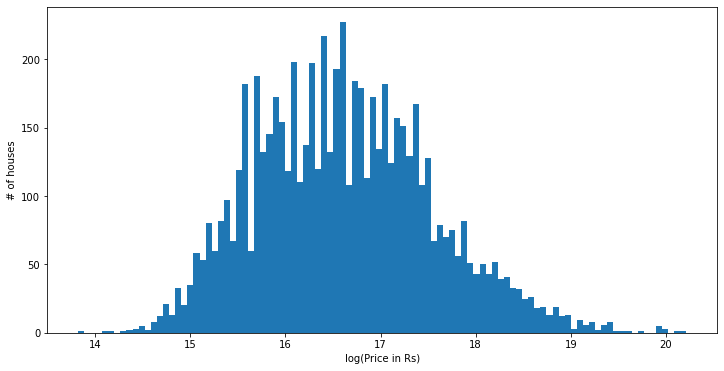

In [114]:
plt.figure(figsize=(12,6))
plt.hist(np.log(data['price']),bins=100)
plt.ylabel('# of houses')
plt.xlabel('log(Price in Rs)')
plt.show()

Creating a list of categorical and numerical variables

In [69]:
categorical_vars = [var for var in data.columns if data[var].dtype == 'O']
categorical_vars

['htype',
 'region',
 'Project Type',
 'Swimming Pool',
 'Parking',
 'Garage',
 'Beachfront',
 'Access for Disabled People',
 'Access to rooftop',
 'Air Conditioning',
 'Alarm System',
 'Automated Garage',
 'Balcony',
 'Basement',
 'Carport',
 'Centralized Ventilation System',
 'Close to Bus Stop',
 'Close to Golf Course',
 'Close to Hospital',
 'Close to School',
 'Close to Shops',
 'Cooking Service',
 'Dressing',
 'Electric Generator',
 'Energy Efficiency - High',
 'Fenced',
 'Fire Alarm System',
 'Fireplace',
 'Fitness Room',
 'Freehold Land',
 'Furnished',
 'Garden',
 'Guarded Parking',
 'House Cleaning',
 'Indoor Spa',
 'Internet/Wi-Fi',
 'Laundry Room',
 'Lift',
 'Located in a private morcellement',
 'Located in a residential complex',
 'Located in a senior residence',
 'Mountain View',
 'Office',
 'Recently Refurbished',
 'River View',
 'Sea Access',
 'Sea View',
 'Secured Parking',
 'Security Bars',
 'Sewage System',
 'Solar Panels',
 'Solar Water Heater',
 'Soundproof',
 'TV R

In [70]:
numerical_vars = [var for var in data.columns if var not in cat_vars and var != 'price']
numerical_vars

['Bedroom(s)',
 'Bathroom(s)',
 'Toilet(s)',
 'Construction Year',
 'Nb. Rooms',
 'Air-con',
 'Interior Surface New',
 'Land Surface New']

Text(0, 0.5, 'Price')

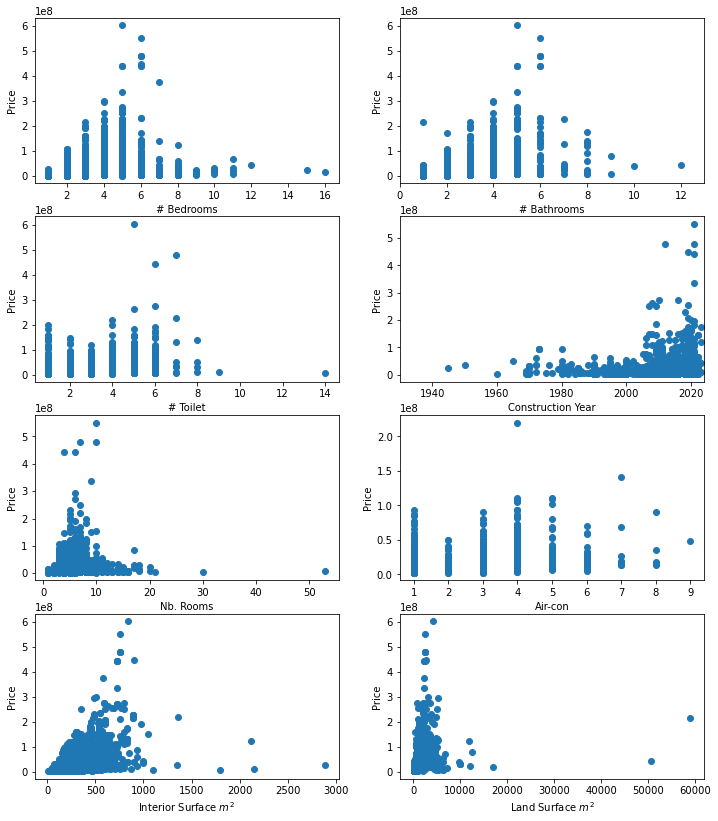

In [127]:
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6), (ax7, ax8)) = plt.subplots(4,2,figsize=(12,14))
ax1.scatter(data['Bedroom(s)'],data['price'])
ax1.set_xlabel('# Bedrooms')
ax1.set_ylabel('Price')

ax2.scatter(data['Bathroom(s)'],data['price'])
ax2.set_xlabel('# Bathrooms')
ax2.set_ylabel('Price')
ax2.set_xlim([0,13])

ax3.scatter(data['Toilet(s)'],data['price'])
ax3.set_xlabel('# Toilet')
ax3.set_ylabel('Price')

ax4.scatter(data['Construction Year'],data['price'])
ax4.set_xlabel('Construction Year')
ax4.set_ylabel('Price')
ax4.set_xlim([1930,2024])

ax5.scatter(data['Nb. Rooms'],data['price'])
ax5.set_xlabel('Nb. Rooms')
ax5.set_ylabel('Price')
#ax5.set_xlim([1950,2024])

ax6.scatter(data['Air-con'],data['price'])
ax6.set_xlabel('Air-con')
ax6.set_ylabel('Price')
#ax6.set_xlim([1950,2024])

ax7.scatter(data['Interior Surface New'],data['price'])
ax7.set_xlabel('Interior Surface $m^2$')
ax7.set_ylabel('Price')
#ax7.set_xlim([1950,2024])

ax8.scatter(data['Land Surface New'],data['price'])
ax8.set_xlabel('Land Surface $m^2$')
ax8.set_ylabel('Price')
#ax8.set_xlim([1950,2024])

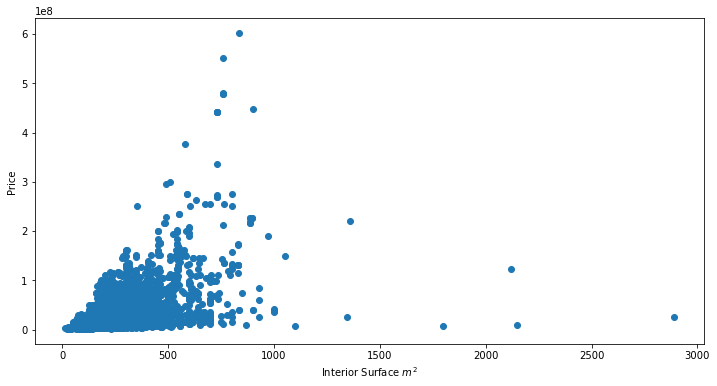

In [86]:
plt.figure(figsize=(12,6))
plt.scatter(data['Interior Surface New'],data['price'])
plt.xlabel('Interior Surface $m^2$')
plt.ylabel('Price')
plt.show()

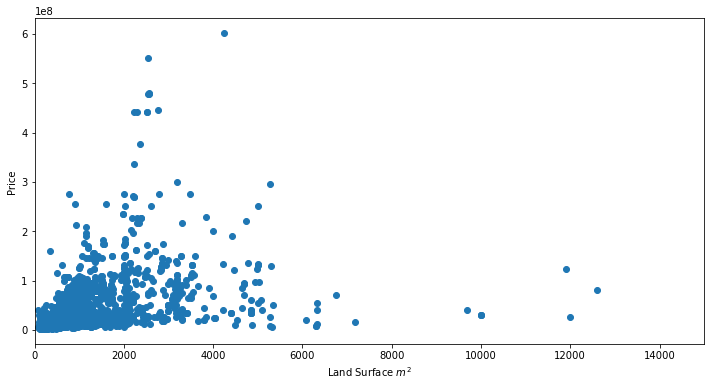

In [88]:
plt.figure(figsize=(12,6))
plt.scatter(data['Land Surface New'],data['price'])
plt.xlabel('Land Surface $m^2$')
plt.ylabel('Price')
plt.xlim([0,15000])
plt.show()

In [104]:
def strip(a):
    return a.strip()
data['region'] = data['region'].apply(strip)

In [115]:
def main_region(a):
    return (a.split(',')[-1]).strip()
data['region_main'] = data['region'].apply(main_region)

def local_region(a):
    return (a.split(',')[0]).strip()
data['region'] = data['region'].apply(local_region)

In [116]:
data['region']

0         St Antoine
1         Bain Boeuf
2         Haute Rive
3        Black River
4          Péreybère
            ...     
6579     Tombeau Bay
6580    Flic en Flac
6581     Tombeau Bay
6582      Beau Champ
6583         Tamarin
Name: region, Length: 6506, dtype: object

In [117]:
pd.set_option('display.max_rows',500)
data.groupby('region')['price'].median()

region
Albion                      8500000.0
Amitié                     13200000.0
Anse Jonchée               45000000.0
Argy                       10000000.0
Arsenal                     8000000.0
Bagatelle                  16400000.0
Baie aux Tortues           11000000.0
Baie du Cap                30762512.0
Bain Boeuf                 13500000.0
Balaclava                  23000000.0
Bambous                     4400000.0
Bar le Duc                 13000000.0
Bassin                      5600000.0
Beau Bassin                 6000000.0
Beau Champ                 76354921.0
Beau Plan                  10500000.0
Beau Vallon                 9225000.0
Beaux Songes               16000000.0
Bel Ombre                  76540940.0
Belle Mare                 97439500.0
Belle Rose (Centre)         6300000.0
Belle Rose (Est)            4707000.0
Belle Vue Harel            26500000.0
Belle Vue Maurel           14500000.0
Belle Étoile                3100000.0
Black River                32000000.0
Blue 

In [118]:
data.groupby('region_main')['price'].median()

region_main
Center        7700000.0
East         57221919.0
North        17665694.0
Rodrigues    14000000.0
South        26500000.0
West         17990000.0
Name: price, dtype: float64

In [119]:
data.groupby('Project Type')['price'].median()

Project Type
G+2                    13337779.0
IRS                    57442500.0
Other                  29200000.0
PDS                    32000000.0
RES                    28665000.0
Residential Project     7500000.0
Senior Residences      11700000.0
Smart City             15500000.0
none                    9900000.0
Name: price, dtype: float64

Looking for variables with a lot of empty/missing values and listing the fraction of missing values

In [123]:

missing_vars = [var for var in data.columns if data[var].isnull().sum() > 0]

data[missing_vars].isnull().mean().sort_values(ascending=False)

Beachfront              0.887335
Air-con                 0.834614
Nb. Rooms               0.751921
Construction Year       0.643867
Land Surface New        0.507685
Toilet(s)               0.458500
Parking                 0.376268
Swimming Pool           0.269136
Bathroom(s)             0.090532
Interior Surface New    0.058869
dtype: float64

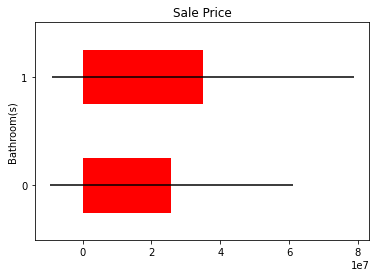

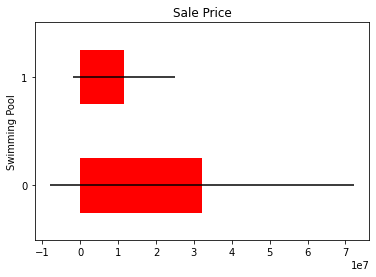

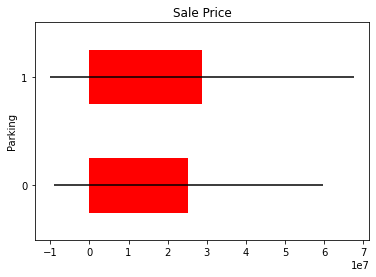

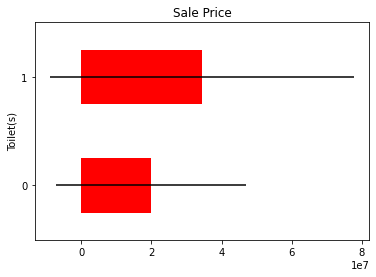

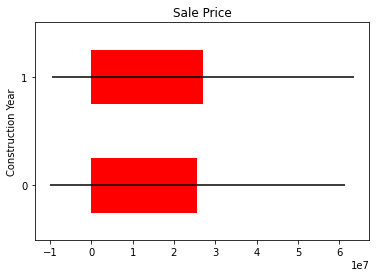

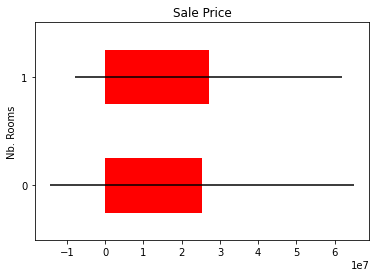

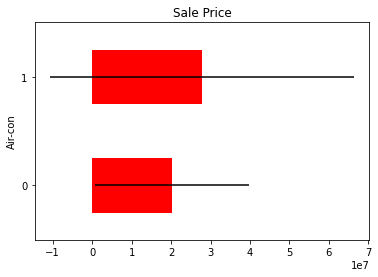

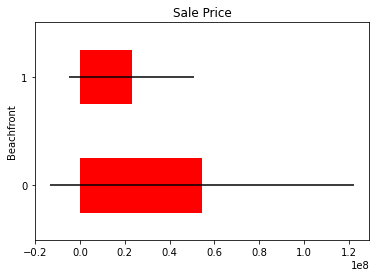

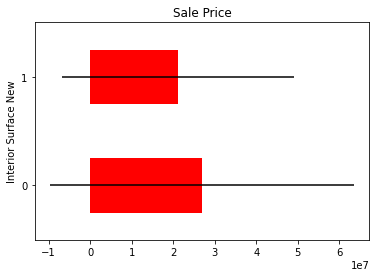

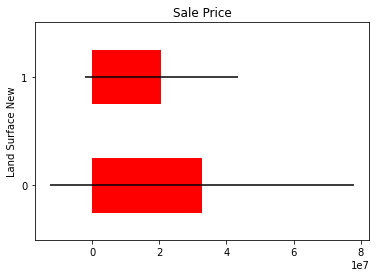

In [126]:
def analyse_na_value(df, var):

    df = df.copy()
    df[var] = np.where(df[var].isnull(), 1, 0)

    # Compare the median  price in the observations where data is missing
    # vs the observations where data is available

    # determine the median price in the groups 1 and 0,
    # and the standard deviation of the price.
    tmp = df.groupby(var)['price'].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='red')

    plt.show()

for var in vars_with_na:
    analyse_na_value(data, var)

In [132]:
data['Construction Year'] = data['Construction Year'].fillna(0)

In [142]:
data[(data['Construction Year']>1940) & (data['Project Type']=='G+2')]['Construction Year'].median()

2019.0

In [149]:
data.loc[data['Construction Year']<1940,['Construction Year']] = data[data['Construction Year']>1940]['Construction Year'].median()

In [152]:
data['Parking'] = data['Parking'].fillna('no')

In [154]:
data['Swimming Pool'] = data['Swimming Pool'].fillna('no')

In [156]:
data['Toilet(s)'] = data['Toilet(s)'].fillna(0)

In [157]:
data['Air-con'] = data['Air-con'].fillna(0)

In [159]:
data['Beachfront'] = data['Beachfront'].fillna('no')

In [161]:
data['Bathroom(s)'] = data['Bathroom(s)'].fillna(data['Bathroom(s)'].median())

In [170]:
med_interior = []
for htyp in data['htype'].unique():
    med_interior.append(data[data['htype']==htyp]['Interior Surface New'].median())
    #data[data['htype']==htyp]['Interior Surface New'] = data[data['htype']==htyp]['Interior Surface New'].fillna(data[data['htype']==htyp]['Interior Surface New'].median())

In [171]:
med_interior

[228.0, 278.7, 133.0, 162.0]

In [172]:
data['Interior Surface New'] = data['Interior Surface New'].fillna(0)

In [178]:
for htyp,meds in zip(data['htype'].unique(),med_interior):
    data.loc[(data['htype']==htyp)&(data['Interior Surface New']==0), ['Interior Surface New']] = meds

In [183]:
med_land = []
for htyp in data['htype'].unique():
    med_land.append(data[data['htype']==htyp]['Land Surface New'].median())

In [184]:
med_land

[nan, 675.4, nan, 262.0]

In [185]:
med_land[0] = 0
med_land[2] = 0

In [186]:
data['Land Surface New'] = data['Land Surface New'].fillna(0)

for htyp,meds in zip(data['htype'].unique(),med_land):
    data.loc[(data['htype']==htyp)&(data['Land Surface New']==0), ['Land Surface New']] = meds

In [187]:
data.to_csv('mauritius_house_train.csv',index=False)